In [1]:
'''Problem statement :  The objective of this case is to predict bike rental count on daily based on the
environmental and seasonal settings.This problem statement lies in the category of forecasting which deals with
predicting continuous value for future(in our case the continuous value is the bike rental count.)'''

'Problem statement :  The objective of this case is to predict bike rental count on daily based on the\nenvironmental and seasonal settings.This problem statement lies in the category of forecasting which deals with\npredicting continuous value for future(in our case the continuous value is the bike rental count.)'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from math import sqrt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from IPython import get_ipython

In [3]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print(bike_df['season'].value_counts())
print(bike_df['yr'].value_counts())
print(bike_df['mnth'].value_counts())
print(bike_df['holiday'].value_counts())
print(bike_df['weekday'].value_counts())
print(bike_df['workingday'].value_counts())
print(bike_df['weathersit'].value_counts())

3    188
2    184
1    181
4    178
Name: season, dtype: int64
1    366
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
0    710
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
1    500
0    231
Name: workingday, dtype: int64
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [5]:
#removing irrelevant attributes, instant because already we have the index, causal+registered=count so no need to keep redundant
#values and we already have variable workingday so no need to keep holiday
del bike_df['instant']
del bike_df['casual']
del bike_df['registered']
del bike_df['holiday']
bike_df.shape

(731, 12)

In [6]:
bike_df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [7]:
#Removing date as we already have month,weekday,hours,year attributes
#Data type conversion for better analysis
del bike_df['dteday']

bike_df['season']=bike_df['season'].astype('category')
bike_df['yr'] = bike_df['yr'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df['workingday']=bike_df['workingday'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')

bike_df['cnt']=bike_df['cnt'].astype('float64')

bike_df.dtypes

season        category
yr            category
mnth          category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt            float64
dtype: object

In [8]:
bike_df.describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


In [9]:
#Converting the normalised values back to original values to understand its distribution
bike_df['temp'] = bike_df['temp']*39
bike_df['atemp'] = bike_df['atemp']*50
bike_df['hum'] = bike_df['hum']*100
bike_df['windspeed'] = bike_df['windspeed']*67

Text(0, 0.5, 'Frequency')

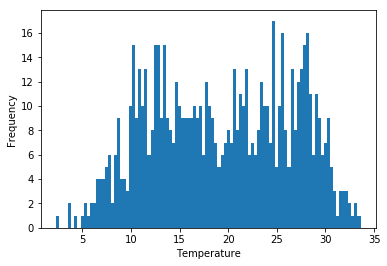

In [10]:
#Distribution of Temperature
plt.hist(bike_df['temp'],bins = 100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

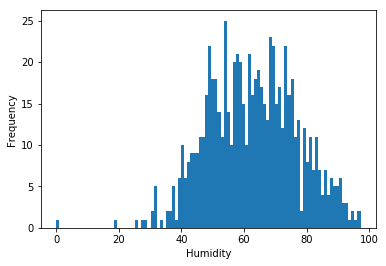

In [11]:
#Distribution of Humidity
plt.hist(bike_df['hum'],bins = 100)
plt.xlabel('Humidity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

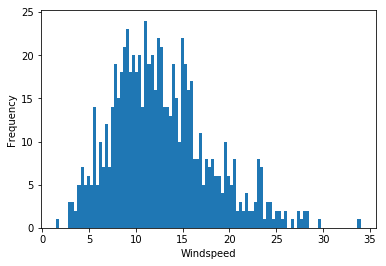

In [12]:
#Distribution of Windspeed
plt.hist(bike_df['windspeed'],bins = 100)
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

In [13]:
#Missing Value Analysis : Data has no missing values
bike_df.isnull().sum()

season        0
yr            0
mnth          0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

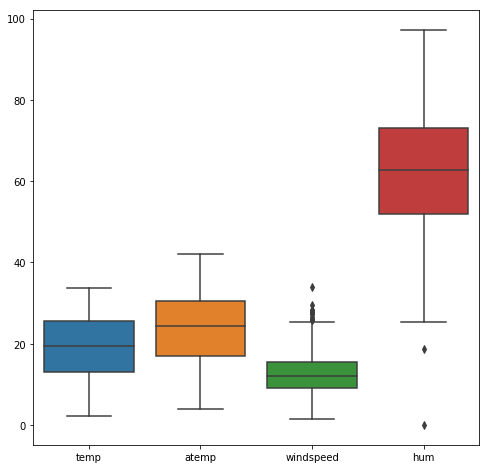

In [14]:
#Check for outliers in data using boxplot
sns.boxplot(data=bike_df[['temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

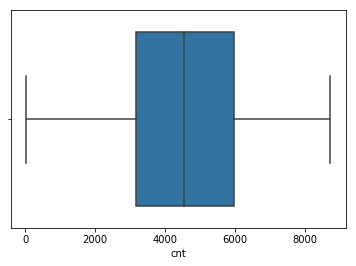

In [15]:
sns.boxplot(bike_df['cnt'])

In [16]:
#since only 2 variables have outliers, so now removing these.
num_variables = ['windspeed','hum']
for i in num_variables:
    q75,q25=np.percentile(bike_df.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25 -(1.5*iqr)
    max=q75 +(1.5*iqr)
    
    bike_df=bike_df.drop(bike_df[bike_df.loc[:,i]<min].index)
    bike_df=bike_df.drop(bike_df[bike_df.loc[:,i]>max].index)

In [17]:
bike_df.describe()

,temp,atemp,hum,windspeed,cnt
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,19.397225,23.812596,63.156227,12.481197,4532.843794
std,7.161050,8.157741,13.922221,4.809648,1933.542429
min,2.306086,3.953480,25.416700,1.500244,22.000000
25%,13.162500,16.896950,52.458300,9.000043,3214.000000
50%,19.727487,24.589150,63.083300,11.959232,4570.000000
75%,25.610013,30.556050,73.291700,15.458307,6031.000000
max,33.605013,42.044800,97.250000,25.333236,8714.000000


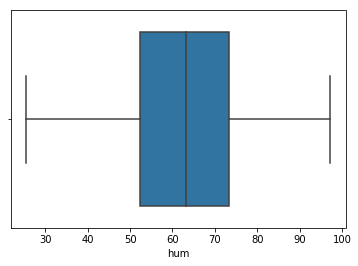

In [18]:
#After removing outliers, variable humidity
sns.boxplot(bike_df['hum'])

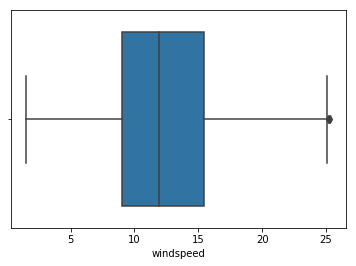

In [19]:
#After removing outliers, variable windspeed
sns.boxplot(bike_df['windspeed'])

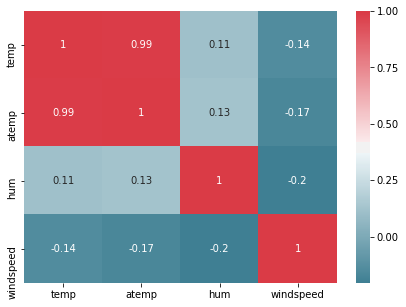

In [20]:
#Feature Selection : remove highly correlated variables
#Correlation matrix for continuous variables
f, ax=plt.subplots(figsize=(7,5))
n_names = ['temp','atemp','hum','windspeed']
df = bike_df.loc[:,n_names]
sns.heatmap(df.corr(),mask=np.zeros_like(df.corr(),dtype=np.bool),
           cmap=sns.diverging_palette(220,10,as_cmap=True),ax=ax,annot = True)

In [21]:
#chi square test for categorical variable
cnames = ['season','workingday','weathersit','yr','mnth']
from scipy.stats import chi2_contingency
for i in cnames:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(bike_df['cnt'],bike_df[i]))
    print(p)

season
0.5545167305842608
workingday
0.47588540831249254
weathersit
0.520434698546695
yr
0.38695146266459124
mnth
0.4781836629471889


In [22]:
#dropping correlated variable
bike_df = bike_df.drop(['atemp'], axis=1)
bike_df.shape

(717, 10)

Text(0, 0.5, 'Frequency')

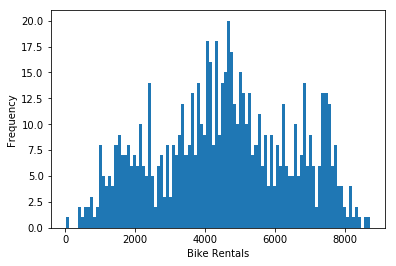

In [23]:
#Exploratory Data Analysis : distribution of target variable tells us that the values are normally distributed
plt.hist(bike_df['cnt'],bins = 100)
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')

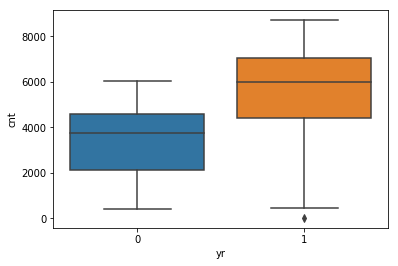

In [24]:
#Rental count according to year, 0:2010, 1:2011
sns.boxplot(bike_df['yr'],bike_df['cnt'])

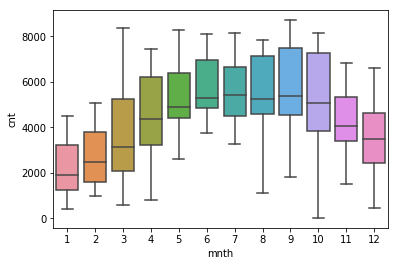

In [25]:
#Rental count according to months
sns.boxplot(bike_df['mnth'],bike_df['cnt'])

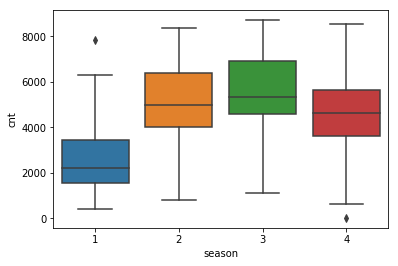

In [26]:
#Rental count according to seasons
sns.boxplot(bike_df['season'],bike_df['cnt'])

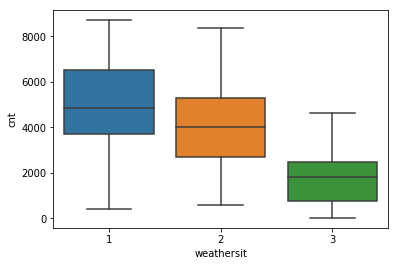

In [27]:
#Rental count according to weather
sns.boxplot(bike_df['weathersit'],bike_df['cnt'])

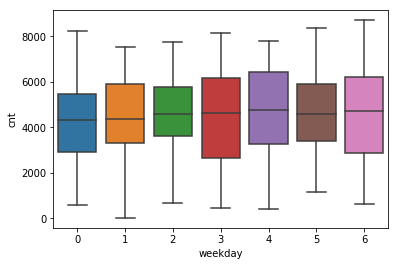

In [28]:
#Rental count according to weekday, 0-Sunday,1-Monday,2-Tuesday,3-Wednesday,4-Thursday,5-Friday,6-Saturday
sns.boxplot(bike_df['weekday'],bike_df['cnt'])

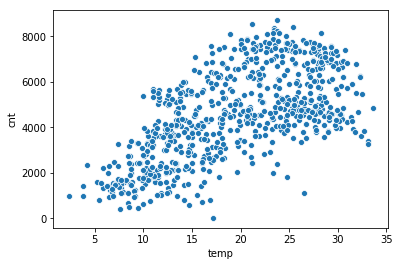

In [29]:
#distribution of temperature vs count, how spread out it is
sns.scatterplot(bike_df['temp'],bike_df['cnt'])

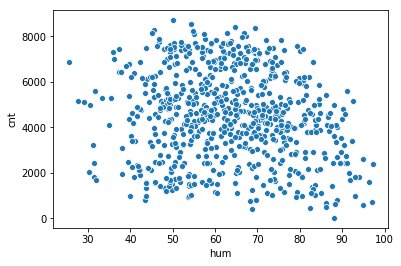

In [30]:
#distribution between humidity vs count
sns.scatterplot(bike_df['hum'],bike_df['cnt'])

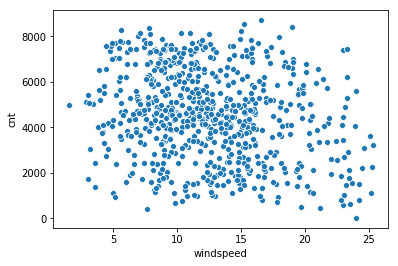

In [31]:
#distribution b/w windspeed vs count
sns.scatterplot(bike_df['windspeed'],bike_df['cnt'])

In [32]:
#Model Building

In [33]:
#Train_test Splitting : Simple Random Sampling as we are dealing with continuous variables
X = bike_df.iloc[:,:-1].values
Y = bike_df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [34]:
#Multiple Linear Regression
lr_model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

In [35]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1729.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:53:45   Log-Likelihood:                -4719.8
No. Observations:                 573   AIC:                             9458.
Df Residuals:                     564   BIC:                             9497.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           555.1093     67.319      8.246      0.000     422.882     687.336
x2          2117.4483     75.658     27.987      0.000    1968.842    2266.054
x3           -40.5851     21.423     -1.894      0.059     -82.663       1.493
x4            91.2785     18.717      4.877      0.000      54.515     128.041
x5           247.5394     81.398      3.041      0.002      87.659     407.420
x6          -577.4152     97.362     -5.931      0.000    -768.651    -386.179
x7           140.2593      5.679     24.697      0.000     129.104     151.414
x8             1.1039      3.160      0.349      0.727      -5.103       7.310
x9           -10.0773      6.804     -1.481      0.139     -23.442       3.287
==============================================================================
Omnibus:                       83.629   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.716
Skew:                          -0.792   Prob(JB):                     2.85e-41
Kurtosis:                       5.304   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Predict the results of test data
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([2829.7399568250357, 4390.214278887396, 2817.461438748707,
       4665.7713956245525, 4484.866445495586, 4735.39552138129,
       6823.255407878306, 1197.2145684912648, 3052.8600783038073,
       1950.6964453809073, 4483.774691551527, 3812.0877081346994,
       2127.368085909863, 7221.373000010756, 6027.321908780569,
       1132.1259351342135, 5153.172526554965, 6271.498040352352,
       3448.6873012639335, 5606.212918196708, 2956.950000505317,
       3508.303162311699, 497.3525687401916, 7049.125730125366,
       5066.453657013808, 3791.148948810482, 4608.8369048515315,
       1765.8872128163803, 7130.776869469153, 856.065271377381,
       3947.7245955030635, 7330.355932091007, 8126.24460820622,
       5503.953107697001, 2200.428294185473, 4049.4710873114154,
       1256.9917690065172, 3945.2231593439105, 3503.198598230562,
       6504.838609940618, 5244.531387638718, 3071.4285745990614,
       6270.731881570296, 1929.6239193179324, 6402.801785463613,
       7300.078285335952, 4

In [37]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [38]:
MAPE(y_test,lr_predictions)*100

19.189884133419714

In [39]:
100 - 19.18
#accuracy : 80.82

80.82

In [40]:
#Decision Tree
train,test = train_test_split(bike_df,test_size = 0.2,random_state=0)
fit = DecisionTreeRegressor(max_depth=5).fit(train.iloc[:,:-1],train.iloc[:,-1])
predictions_DT = fit.predict(test.iloc[:,:-1])
predictions_DT

array([3487.23913043, 4674.48275862, 2424.        , 4674.48275862,
       4883.19047619, 5698.5       , 7704.92      , 1728.12121212,
       2602.66666667, 2647.6       , 4674.48275862, 4674.48275862,
       1728.12121212, 6736.53012048, 5971.14285714, 1249.52      ,
       4674.48275862, 6736.53012048, 3487.23913043, 5971.14285714,
       3332.14285714, 2424.        , 1249.52      , 6736.53012048,
       6736.53012048, 3936.34375   , 3978.5       , 1728.12121212,
       6736.53012048, 1728.12121212, 3487.23913043, 6736.53012048,
       6736.53012048, 5971.14285714, 1728.12121212, 4674.48275862,
       1249.52      , 3936.34375   , 3219.58333333, 7001.7       ,
       4674.48275862, 2679.5       , 6736.53012048, 2647.6       ,
       6060.78571429, 6736.53012048, 4674.48275862, 6736.53012048,
       5698.5       , 4674.48275862, 4883.19047619, 4674.48275862,
       2602.66666667, 4674.48275862, 7001.7       , 6736.53012048,
       7099.5       , 1728.12121212, 6736.53012048, 1249.52   

In [41]:
print('R square value for Decision Tree is: ',metrics.r2_score(y_test,predictions_DT))
print('MAPE value for Decision Tree is:', MAPE(y_test,predictions_DT))

R square value for Decision Tree is:  0.8685151464793568
MAPE value for Decision Tree is: 0.18126859697229977


In [42]:
100 - 18.12
#Accuracy : 81.53

81.88

In [43]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=500,random_state=0).fit(train.iloc[:,:-1], train.iloc[:,-1])

In [44]:
rf_model.feature_importances_

array([0.06342371, 0.28443656, 0.03587565, 0.01527715, 0.00485423,
       0.01896193, 0.46807001, 0.06915639, 0.03994435])

In [45]:
rf_predictions = rf_model.predict(test.iloc[:,:-1])
rf_predictions

array([2810.604, 4910.396, 2762.368, 4922.24 , 5518.898, 5256.516,
       7606.54 , 1546.9  , 2524.882, 2170.168, 4094.236, 4155.118,
       1940.092, 7430.672, 6711.04 , 1356.868, 4387.496, 7253.516,
       3706.51 , 5788.782, 3491.852, 2717.264, 1044.858, 7445.204,
       6170.256, 3245.156, 4091.916, 1900.556, 6965.914, 1100.942,
       3997.628, 7062.312, 5869.456, 6131.076, 2500.546, 4681.46 ,
       1450.3  , 3892.352, 2641.25 , 7145.376, 4569.602, 2638.278,
       7431.406, 2010.388, 6818.474, 6901.206, 4137.108, 7181.872,
       6067.684, 4287.062, 5171.058, 3778.526, 2946.552, 5031.36 ,
       7344.568, 7400.98 , 6455.956, 2178.82 , 6995.352,  818.824,
       4732.572, 6442.038, 4861.7  , 1634.616, 5283.262, 4644.06 ,
       6143.936, 7242.246, 5049.344, 1891.48 , 5318.18 , 4022.878,
       2115.836, 7333.742, 4950.26 , 6045.258, 6910.554, 1559.54 ,
       2795.19 , 6847.174, 6728.906, 5839.336, 4653.528, 4003.176,
        872.826, 2179.376, 5046.706, 3255.066, 4714.136, 6312.

In [46]:
print('R square value for Random Forest is: ',metrics.r2_score(y_test,rf_predictions))
print('MAPE value for Random Forest is:', MAPE(y_test,rf_predictions))

R square value for Random Forest is:  0.9219681181377206
MAPE value for Random Forest is: 0.15131122128769842


In [47]:
100 - 15.13
#Accuracy : 84.87

84.87

In [48]:
#Conclusion
#Best model : Multiple Linear Regression as Rsquare is the highest means the predictors explain the target variable quite well 
#and the accuracy is also decent 80.82%